In [1]:
import numpy as np
import pandas as pd
import seaborn as sns
import matplotlib.pyplot as plt
%matplotlib inline

In [2]:
from sklearn.datasets import make_blobs

In [6]:
X,y = make_blobs(n_samples = 1000,n_features=2,centers = 3,random_state=10)

In [7]:
X,y

(array([[ 4.56889035, -9.9492391 ],
        [ 2.35388502,  3.51466401],
        [-0.01750156, -6.05038477],
        ...,
        [ 4.89123569,  4.86995972],
        [ 1.09272697,  4.04641343],
        [ 0.97077866, -4.8289551 ]]),
 array([0, 1, 2, 2, 1, 2, 2, 2, 2, 2, 0, 1, 0, 0, 2, 2, 2, 0, 0, 0, 2, 0,
        2, 2, 1, 1, 0, 1, 0, 0, 0, 0, 0, 0, 0, 1, 1, 0, 1, 1, 1, 2, 1, 1,
        0, 1, 2, 2, 0, 0, 0, 2, 1, 2, 1, 2, 2, 0, 1, 1, 2, 2, 0, 1, 2, 0,
        1, 0, 1, 1, 1, 2, 2, 0, 2, 2, 0, 0, 0, 2, 2, 2, 1, 2, 1, 0, 1, 2,
        2, 1, 1, 0, 0, 1, 2, 0, 1, 0, 0, 1, 1, 2, 1, 1, 2, 0, 2, 1, 0, 2,
        2, 1, 0, 1, 2, 0, 1, 2, 2, 1, 0, 0, 0, 0, 0, 0, 1, 2, 1, 1, 1, 2,
        1, 2, 2, 2, 2, 0, 2, 2, 0, 1, 2, 0, 1, 0, 2, 1, 1, 2, 1, 0, 0, 2,
        2, 1, 2, 2, 1, 2, 1, 2, 0, 0, 1, 1, 1, 1, 0, 2, 1, 2, 2, 2, 0, 0,
        2, 0, 0, 0, 2, 2, 0, 2, 1, 1, 2, 2, 2, 1, 2, 2, 0, 0, 1, 0, 1, 1,
        2, 2, 2, 0, 1, 2, 0, 0, 1, 1, 1, 2, 1, 1, 1, 1, 1, 1, 0, 0, 1, 2,
        1, 2, 0, 0, 2, 1, 2, 

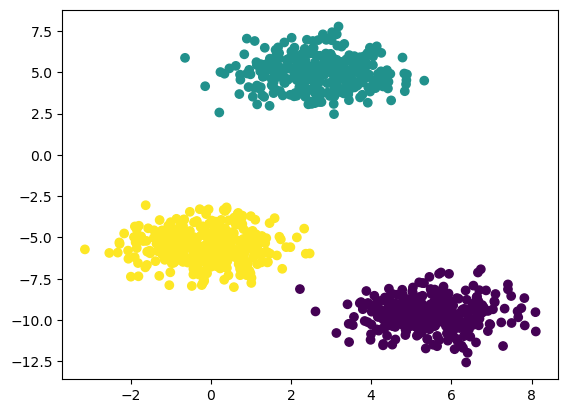

In [8]:
plt.scatter(X[:,0],X[:,1],c=y)

## K Means Clustering

In [9]:
from sklearn.preprocessing import StandardScaler
sc = StandardScaler()

In [10]:
from sklearn.model_selection import train_test_split
X_train,X_test,y_train,y_test =  train_test_split(X,y,test_size=0.33,random_state=42)

In [11]:
X_train_scaled = sc.fit_transform(X_train)
X_test_scaled = sc.transform(X_test)

In [12]:
from sklearn.cluster import KMeans

In [16]:
import warnings
warnings.filterwarnings('ignore')

## Elbow method to select k values
wcss=[]
for k in range(1,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    wcss.append(kmeans.inertia_)

In [17]:
wcss

[1339.999999999999,
 571.3457849074307,
 119.48468984536363,
 96.53744989490777,
 74.4147371374737,
 53.876110976644696,
 47.146143298778654,
 41.019705732071735,
 35.3256060645094,
 32.569574845073106]

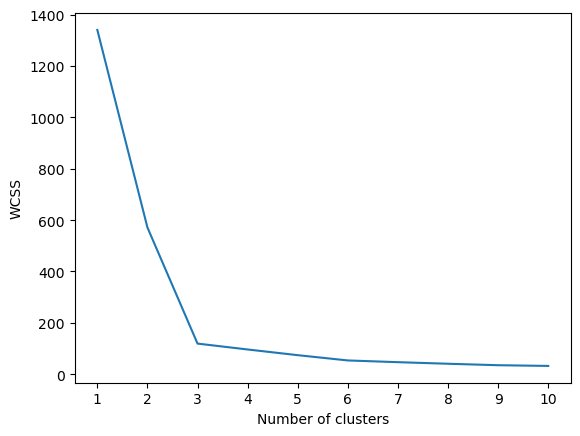

In [20]:
## plot elbow curve
plt.plot(range(1,11),wcss)
plt.xticks(range(1,11))
plt.xlabel("Number of clusters")
plt.ylabel("WCSS")
plt.show()

here we clearly see that no_of_clusters = 3 where wcss value can be drastically changes and after that it will stable

we also create our dataset for 3 clusters, so here it is varified

In [21]:
kmeans = KMeans(n_clusters=3,init="k-means++")

In [22]:
kmeans.fit_predict(X_train_scaled)

array([1, 0, 1, 0, 0, 2, 2, 1, 0, 1, 2, 2, 2, 0, 2, 2, 1, 1, 1, 2, 2, 2,
       2, 1, 1, 2, 2, 2, 1, 1, 0, 1, 2, 1, 1, 0, 1, 0, 0, 0, 2, 2, 0, 2,
       2, 0, 0, 0, 1, 2, 2, 0, 2, 2, 1, 2, 0, 1, 0, 1, 1, 2, 0, 0, 0, 2,
       0, 0, 2, 1, 1, 2, 2, 2, 0, 0, 0, 2, 2, 0, 2, 0, 1, 1, 1, 0, 2, 1,
       2, 0, 0, 1, 0, 1, 0, 2, 2, 2, 1, 2, 0, 2, 1, 1, 0, 0, 0, 1, 2, 1,
       0, 0, 2, 2, 0, 1, 1, 2, 2, 1, 2, 0, 2, 0, 2, 1, 2, 2, 2, 2, 2, 1,
       2, 2, 2, 2, 2, 0, 1, 0, 2, 0, 1, 1, 0, 2, 0, 1, 1, 1, 1, 2, 1, 0,
       1, 1, 1, 2, 1, 2, 2, 2, 1, 1, 1, 0, 1, 2, 0, 0, 1, 0, 1, 1, 1, 2,
       1, 1, 1, 1, 2, 2, 0, 2, 2, 1, 0, 0, 1, 2, 2, 1, 2, 0, 0, 2, 0, 2,
       0, 1, 1, 1, 0, 1, 0, 0, 2, 2, 0, 0, 2, 1, 0, 0, 2, 0, 1, 1, 1, 1,
       1, 2, 0, 0, 0, 1, 2, 1, 2, 1, 0, 2, 1, 0, 2, 0, 1, 0, 1, 1, 2, 0,
       2, 0, 1, 1, 2, 2, 2, 2, 2, 0, 0, 2, 1, 2, 2, 2, 1, 0, 1, 1, 2, 1,
       2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 0, 0, 2, 0, 0, 0, 2, 0, 1, 0, 1, 0,
       0, 1, 1, 1, 0, 2, 0, 2, 2, 0, 0, 0, 0, 0, 1,

In [23]:
y_pred = kmeans.predict(X_test_scaled)

In [24]:
y_pred

array([2, 0, 0, 1, 0, 2, 2, 1, 2, 2, 0, 0, 1, 2, 1, 2, 0, 2, 0, 2, 0, 0,
       2, 1, 1, 2, 2, 2, 1, 2, 1, 2, 0, 0, 2, 2, 1, 1, 0, 1, 0, 1, 2, 2,
       2, 1, 2, 1, 2, 1, 2, 0, 0, 1, 2, 0, 1, 0, 2, 0, 2, 1, 1, 2, 1, 0,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 0, 1, 1, 2, 2, 1, 0, 2, 2, 1, 1, 2,
       0, 2, 2, 1, 1, 1, 0, 1, 0, 2, 1, 0, 2, 0, 0, 1, 0, 0, 0, 0, 0, 0,
       2, 1, 1, 2, 1, 2, 1, 1, 1, 2, 1, 0, 1, 0, 1, 1, 0, 1, 0, 2, 2, 0,
       0, 2, 2, 2, 0, 1, 1, 2, 0, 2, 1, 1, 1, 2, 0, 0, 0, 1, 1, 1, 2, 1,
       0, 0, 1, 1, 2, 2, 0, 0, 2, 2, 1, 2, 0, 1, 0, 0, 2, 0, 2, 2, 0, 2,
       1, 1, 0, 0, 2, 2, 0, 0, 2, 0, 2, 1, 1, 0, 2, 2, 1, 2, 1, 1, 0, 1,
       1, 0, 0, 1, 0, 0, 2, 2, 1, 0, 2, 0, 0, 1, 2, 1, 0, 2, 2, 1, 0, 0,
       0, 1, 1, 0, 1, 2, 1, 0, 2, 2, 0, 0, 1, 2, 0, 0, 0, 0, 0, 2, 2, 0,
       0, 1, 2, 2, 2, 0, 1, 0, 1, 0, 0, 2, 2, 0, 2, 1, 0, 2, 0, 1, 0, 2,
       0, 2, 0, 0, 2, 1, 1, 2, 0, 2, 2, 2, 1, 0, 2, 1, 0, 2, 2, 2, 1, 1,
       2, 1, 1, 1, 2, 1, 2, 2, 0, 2, 0, 1, 2, 1, 1,

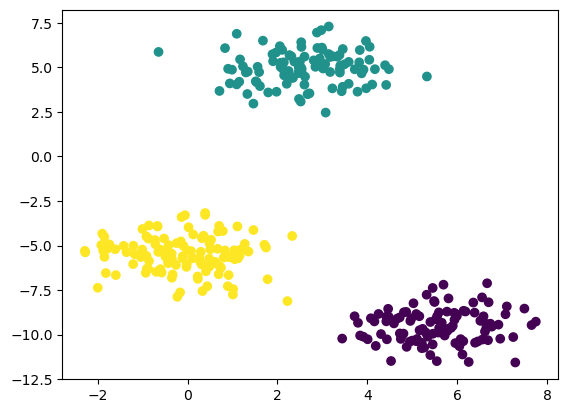

In [26]:
plt.scatter(X_test[:,0],X_test[:,1],c=y_pred)

### validating k values

    1. kneelocator
    2. silhoutte clustering

### kneelocator

In [27]:
pip install kneed

  Obtaining dependency information for kneed from https://files.pythonhosted.org/packages/9a/1b/7e726d8616e813007874468c61790099ba21493e0ea07561b7d9fc53151c/kneed-0.8.5-py3-none-any.whl.metadata
Note: you may need to restart the kernel to use updated packages.


In [31]:
from kneed import KneeLocator
kl = KneeLocator(range(1,11),wcss,curve="convex",direction="decreasing")

In [33]:
print(kl.elbow) ## for justying k value which we get from elbow curve

3


### silhoutte scoring

In [34]:
from sklearn.metrics import silhouette_score

In [43]:
silhoutte_coefficients = []
for k in range(2,11):
    kmeans = KMeans(n_clusters=k,init="k-means++")
    kmeans.fit(X_train_scaled)
    score = silhouette_score(X_train_scaled, kmeans.labels_)
    silhoutte_coefficients.append(score)

In [44]:
silhoutte_coefficients

[0.5842458853138647,
 0.7577303811282187,
 0.6467197792280136,
 0.5495793698642143,
 0.44771643087023266,
 0.42979287686088813,
 0.41293599781444107,
 0.3880155421009357,
 0.38006943764131]

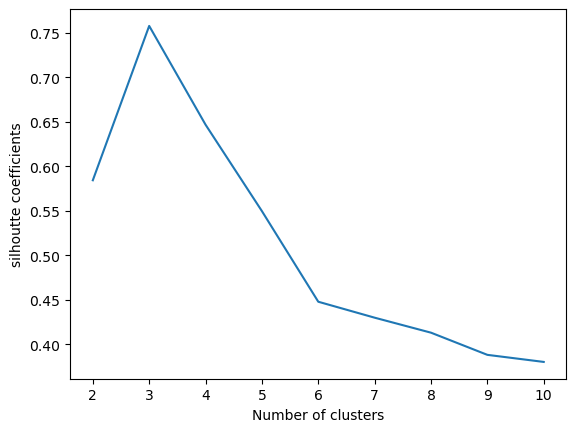

In [45]:
plt.plot(range(2,11),silhoutte_coefficients)
plt.xticks(range(2,11))
plt.xlabel("Number of clusters")
plt.ylabel("silhoutte coefficients")
plt.show()

for k=3, high silhoutte score